Kết nối với Google Drive


Khai báo các thư viện cần thiết

In [1]:
import numpy as np # test
import pandas as pd
import matplotlib.pyplot as plt


Khai báo đường dẫn để lấy dữ liệu

In [5]:
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'

Xây dựng hàm đọc dữ liệu từ file 

In [3]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
  """
  This shuffle param is active when .gz is downloaded at:
  - 'http://yann.lecun.com/exdb/mnist/'
  - This function return random num_images in 60000 or 10000
  """
  # read data
  import gzip # to decompress gz (zip) file
  # open file training to read training data
  f_images = gzip.open(images_path,'r')
  # skip 16 first bytes because these are not data, only header infor
  f_images.read(16)
  # general: read num_images data samples if this parameter is set;
  # if not, read all (60000 training or 10000 test)
  real_num = num_images if not shuffle else (60000 if _is else 10000)
  # read all data to buf_images (28x28xreal_num)
  buf_images = f_images.read(image_size * image_size * real_num)
  # images
  images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
  images = images.reshape(real_num, image_size, image_size,)
  # Read labels
  f_labels = gzip.open(labels_path,'r')
  f_labels.read(8)

  labels = np.zeros((real_num)).astype(np.int64)
  # rearrange to correspond the images and labels
  for i in range(0, real_num):
    buf_labels = f_labels.read(1)
    labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    
    # shuffle to get random images data
  if shuffle is True:
    rand_id = np.random.randint(real_num, size=num_images)
    images = images[rand_id, :]
    labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
  return images, labels

Lấy dữ liệu và chia tập dữ liệu

In [6]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Ta muốn có 3 tập dữ liệu, train, validation and test. Vậy nên ta sẽ gộp 2 bộ train và test ban đầu lại và tách thành 3 bộ

In [7]:
# Combine train and test data
all_images = np.concatenate([train_images, test_images], axis=0)
all_labels = np.concatenate([train_labels, test_labels], axis=0)

# Shuffle combined data
np.random.seed(42)
shuffle_idx = np.random.permutation(len(all_images))
all_images = all_images[shuffle_idx]
all_labels = all_labels[shuffle_idx]

# Split into train, test, and validation sets
train_split = 0.8
val_split = 0.1
test_split = 0.1

num_examples = len(all_images)
num_train = int(train_split * num_examples)
num_val = int(val_split * num_examples)

train_images = all_images[:num_train]
train_labels = all_labels[:num_train]

val_images = all_images[num_train:num_train+num_val]
val_labels = all_labels[num_train:num_train+num_val]

test_images = all_images[num_train+num_val:]
test_labels = all_labels[num_train+num_val:]

print(train_images.shape, train_labels.shape)
print(val_images.shape, val_labels.shape)
print(test_images.shape, test_labels.shape)


(56000, 784) (56000,)
(7000, 784) (7000,)
(7000, 784) (7000,)


Hiển thị một số ví dụ

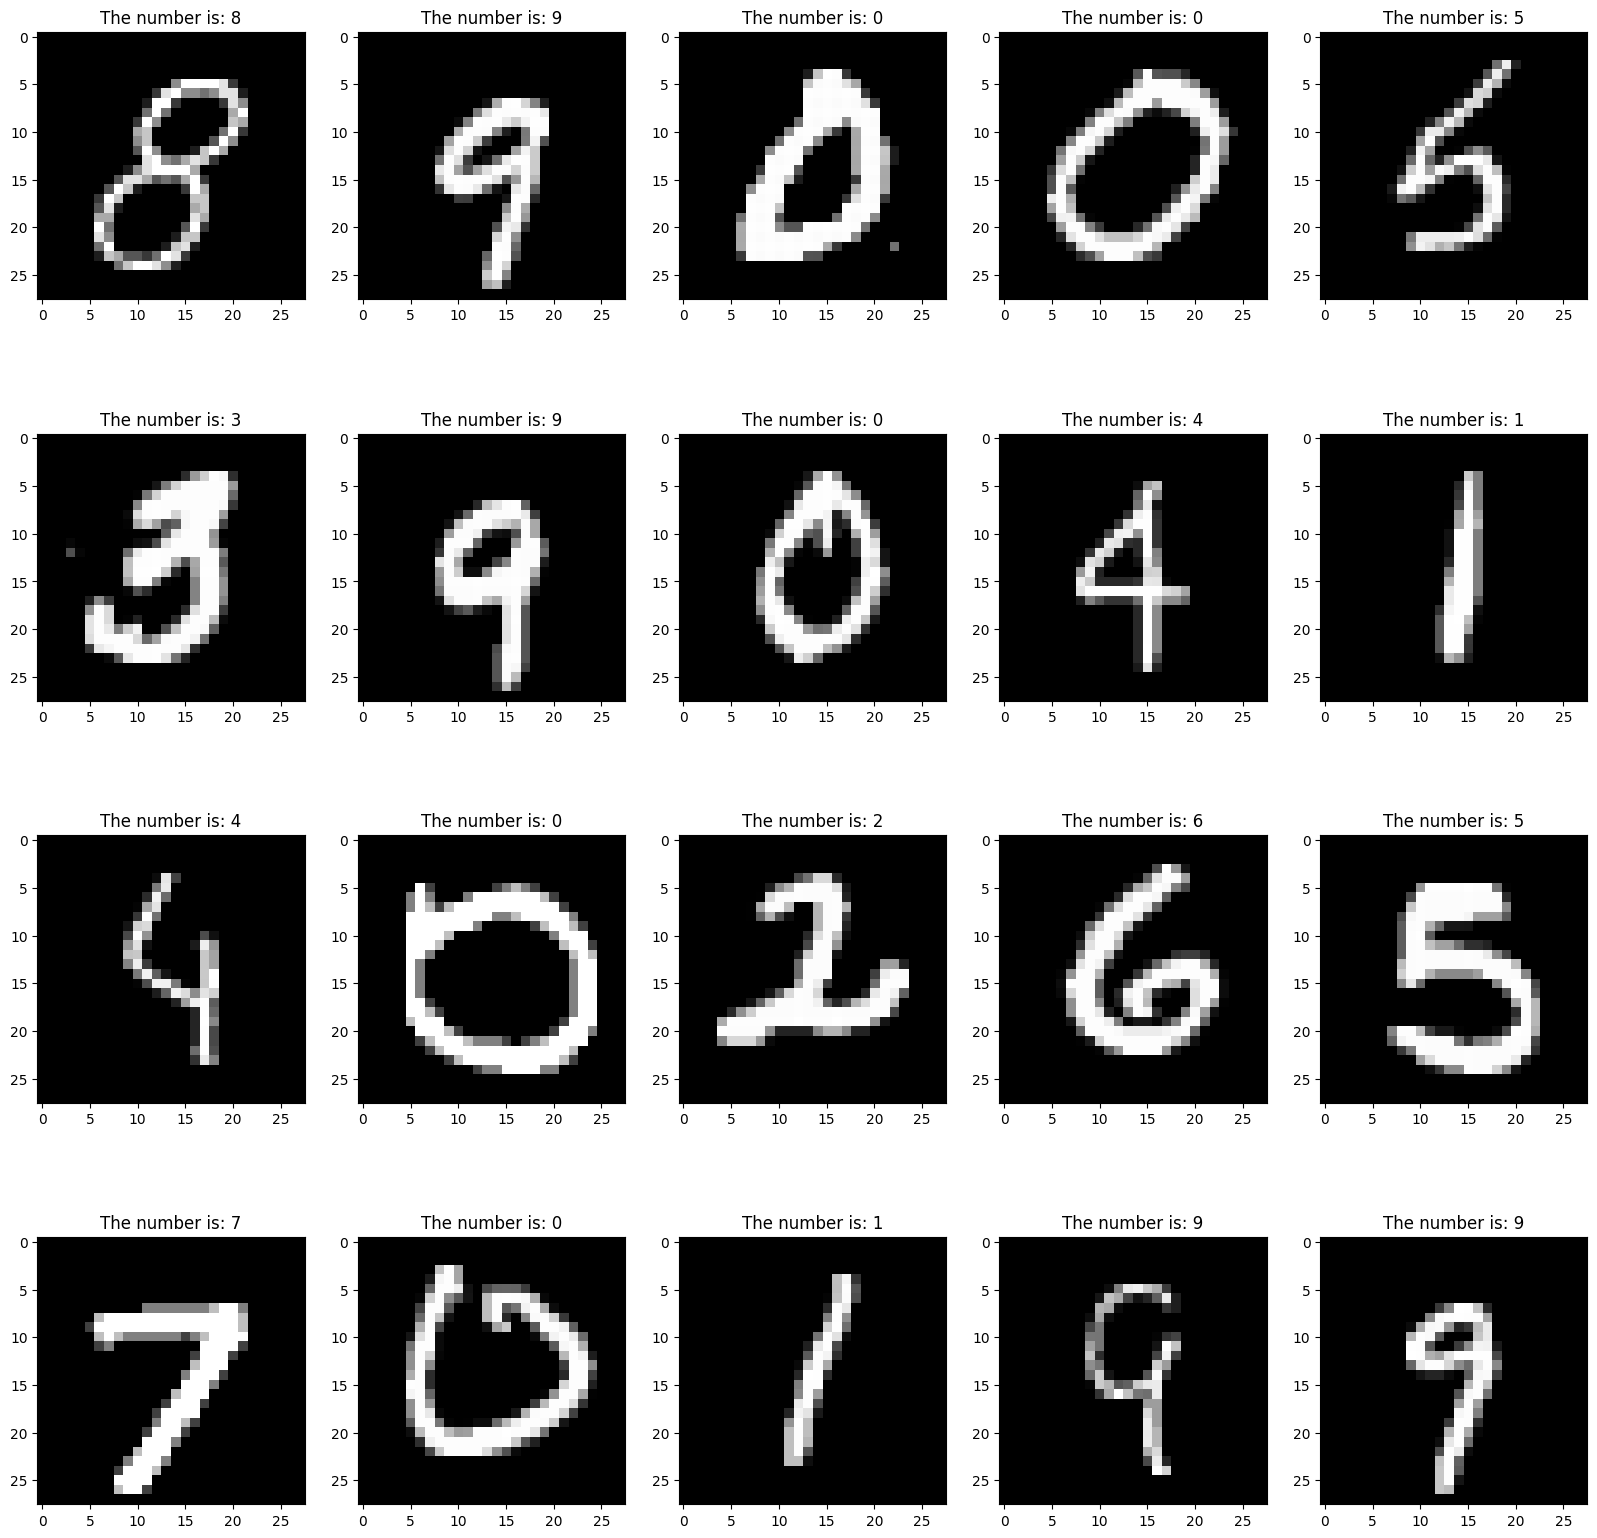

In [8]:
fig, ax = plt.subplots(nrows = 4, ncols = 5, figsize = (20,20))
for i in range(4):
  for j in range(5):
    idx = np.random.randint(10000)
    ax[i][j].imshow(train_images[idx].reshape(28,28), cmap='gray')
    ax[i][j].set_title(f'The number is: {train_labels[idx]}')
plt.show()


Đưa ảnh về kích thước 28x28 và chuẩn hóa pixel của ảnh về khoảng (0,1)

In [8]:
# Phần này
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255

X_valid = val_images.reshape((val_images.shape[0], 28, 28, 1))
X_valid = X_valid.astype('float32') / 255

X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
X_test = X_test.astype('float32') / 255


Mã hóa phân loại nhãn về dạng one-hot vector

In [ ]:
# One-hot vector của ta sẽ là một ma trận gồm 10 cột (tương ứng 1o giá trị của nhãn), và số hàng cùng số lượng giá trị
# Nhãn có giá trị thì ở dạng one-hot vector sẽ được đánh số 1 ở vị trí tương ứng, các vị trí khác trong hàng sẽ để đánh số 0
y_train = tf.keras.utils.to_categorical(train_labels)
y_valid = tf.keras.utils.to_categorical(val_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

NameError: ignored

In [ ]:
# Ta in ra kiểm tra xem số lượng dữ liệu có bị thay đổi sau quá trình chuẩn hóa không
print("Training Images:", X_train.shape)
print('Validation Images:', X_valid.shape)
print('-' * 10)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print('-' * 10)
print("Validation Images:", X_valid.shape)
print("Test Labels:", y_test.shape)

Training Images: (44800, 28, 28, 1)
Validation Images: (5600, 28, 28, 1)
----------
Testing Images: (5600, 28, 28, 1)
Training Labels: (44800, 10)
----------
Validation Images: (5600, 28, 28, 1)
Test Labels: (5600, 10)


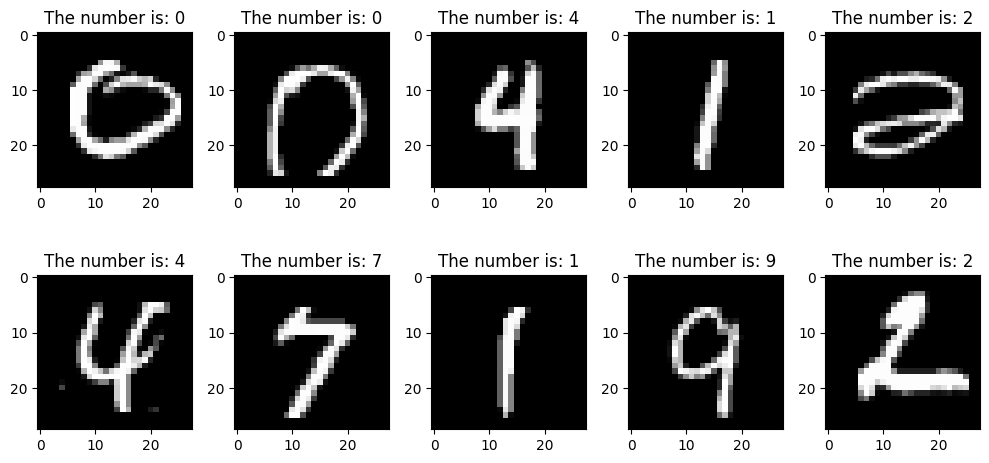

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,5))
for i in range(2):
  for j in range(5):
    idx = np.random.randint(10000)
    ax[i][j].imshow(X_train[idx], cmap='gray')
    ax[i][j].set_title(f'The number is: {train_labels[idx]}')
plt.tight_layout()
plt.show()


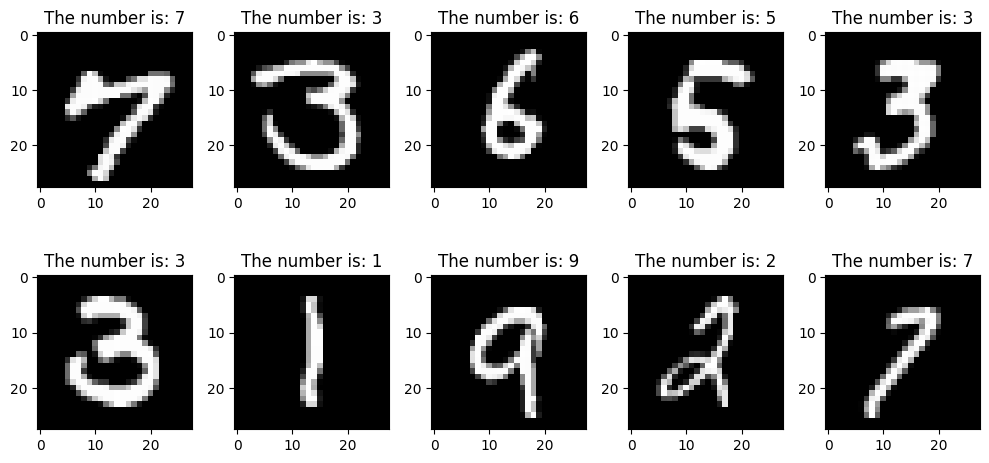

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,5))
for i in range(2):
  for j in range(5):
    idx = np.random.randint(X_valid.shape[0])
    ax[i][j].imshow(X_valid[idx], cmap='gray')
    ax[i][j].set_title(f'The number is: {val_labels[idx]}')
plt.tight_layout()
plt.show()


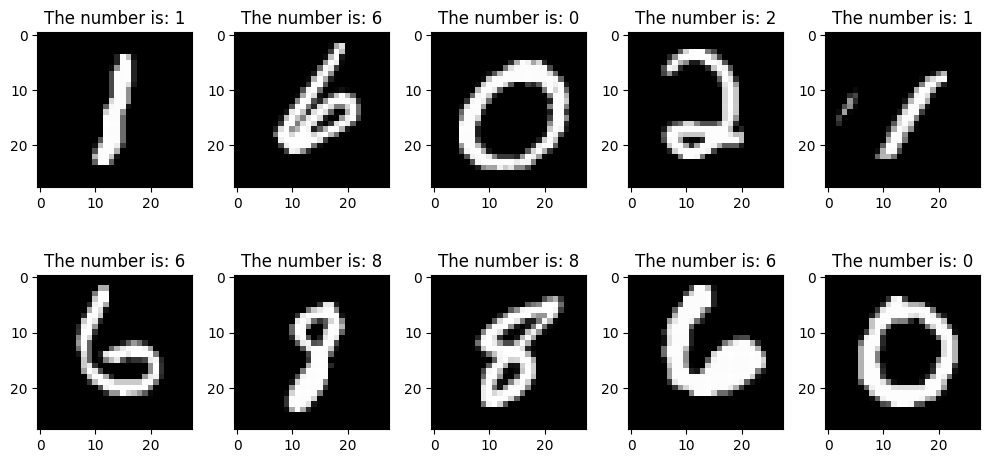

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,5))
for i in range(2):
  for j in range(5):
    idx = np.random.randint(X_test.shape[0])
    ax[i][j].imshow(X_test[idx], cmap='gray')
    ax[i][j].set_title(f'The number is: {test_labels[idx]}')
plt.tight_layout()
plt.show()


Lấy số chiều của ảnh và số lượng lớp

In [ ]:
idx,width, height, channel = X_train[:0].shape
num_classes = len(y_train[0])

print('width, height, channel:',width, height, channel)
print('classes: ',num_classes)

width, height, channel: 28 28 1
classes:  10


## Convolutional Neural Network (CNN)

In [ ]:
def cnn_block(layer, filters_num,kernel_size, strides, kernel_ini, padding,\
               dropout_rate, name_index, pooling = True, batnorm = True):
    layer = layers.Conv2D(
        filters=filters_num, 
        kernel_size = kernel_size,
        strides=strides,
        activation='relu',
        kernel_initializer = kernel_ini,
        padding = padding, 
        name=f'block_Conv{name_index}' 
    )(layer)

    if not pooling:
        layer = layers.BatchNormalization(name=f'block_batch{name_index}')(layer)
        return layers.Dropout(rate=dropout_rate)(layer)
    if not batnorm:
        layer = layers.Dropout(rate=dropout_rate)(layer)
        return layers.MaxPooling2D((2,2), name=f'block_maxpool{name_index}')(layer)
    layer = layers.BatchNormalization(name=f'block_batch{name_index}')(layer)
    layer = layers.Dropout(rate=dropout_rate)(layer)

    return layers.MaxPooling2D((2,2), name=f'block_maxpool{name_index}')(layer)

def build_model():
  input_img = tf.keras.Input(shape=(width, height, channel), name="image")
  layer = cnn_block(input_img, 32,(5,5), (1, 1),  "he_normal", "same", 0.2, 1, batnorm = False, pooling = False)
  layer = cnn_block(layer, 32,(3,3), (1, 1), "he_normal", "same", 0.2, 2, batnorm = False)

  layer = cnn_block(layer, 64,(5,5), (1, 1), "he_normal", "same", 0.2, 3)
  layer = cnn_block(layer, 64,(3,3),  (1, 1),"he_normal", "same", 0.2, 4, pooling = False)
  layer = cnn_block(layer, 64,(3,3),  (1, 1),"he_normal", "same", 0.2, 5)

  layer = layers.Flatten()(layer)
  layer = layers.Dropout(0.3)(layer)
  layer = layers.Dense(64, activation='relu', name='dense1')(layer)
  layer = layers.Dropout(0.3)(layer)
  layer = layers.Dense(32, activation='relu', name='dense2')(layer)
  output = layers.Dense(num_classes, activation='softmax', name='output')(layer)
  model = tf.keras.models.Model(inputs=input_img, outputs=output)
  return model



Ta tiến hành thiết lập cấu trúc mạng của ta

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 block_Conv1 (Conv2D)        (None, 28, 28, 32)        832       
                                                                 
 block_batch1 (BatchNormaliz  (None, 28, 28, 32)       128       
 ation)                                                          
                                                                 
 dropout_21 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 block_Conv2 (Conv2D)        (None, 28, 28, 32)        9248      
                                                                 
 dropout_22 (Dropout)        (None, 28, 28, 32)        0         
                                                           

In [ ]:
# Compile the model.
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam'
), loss='categorical_crossentropy', metrics=['accuracy'])

## Huấn luyện mô hình

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='/content/gdrive/MyDrive/Part_2_Third_Year/Machine learning/Final_Exam/tensor_board/')
# Define the parameters.
num_epochs = 100
batch_size = 64

best_model = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Part_2_Third_Year/Machine learning/Final_Exam/model_saved/best_model_1.hdf5', monitor='val_loss', verbose=1,save_weights_only = False,save_best_only=True, mode="min")
# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_valid, y_valid),
                      callbacks=[best_model,tensorboard])

Epoch 1/100
698/700 [============================>.] - ETA: 0s - loss: 1.7499 - accuracy: 0.3996
Epoch 1: val_loss improved from inf to 0.64631, saving model to /content/gdrive/MyDrive/Part_2_Third_Year/Machine learning/Final_Exam/model_saved/best_model_1.hdf5
700/700 [==============================] - 14s 9ms/step - loss: 1.7473 - accuracy: 0.4005 - val_loss: 0.6463 - val_accuracy: 0.8505
Epoch 2/100
700/700 [==============================] - ETA: 0s - loss: 0.6081 - accuracy: 0.7993
Epoch 2: val_loss improved from 0.64631 to 0.25054, saving model to /content/gdrive/MyDrive/Part_2_Third_Year/Machine learning/Final_Exam/model_saved/best_model_1.hdf5
700/700 [==============================] - 7s 10ms/step - loss: 0.6081 - accuracy: 0.7993 - val_loss: 0.2505 - val_accuracy: 0.9357
Epoch 3/100
697/700 [============================>.] - ETA: 0s - loss: 0.3306 - accuracy: 0.8978
Epoch 3: val_loss improved from 0.25054 to 0.18310, saving model to /content/gdrive/MyDrive/Part_2_Third_Year/Mac

In [ ]:
PATH_MODEL = r'/content/gdrive/MyDrive/Part_2_Third_Year/Machine learning/Final_Exam/model_saved/model_1.hdf5'

## Hiển thị ma trận và chỉ số accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

175/175 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9964
Test Accuracy: 0.9964285492897034
Test Loss: 0.0177526343613863


In [ ]:
# Save the metrics.
metrics = history.history

In [ ]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

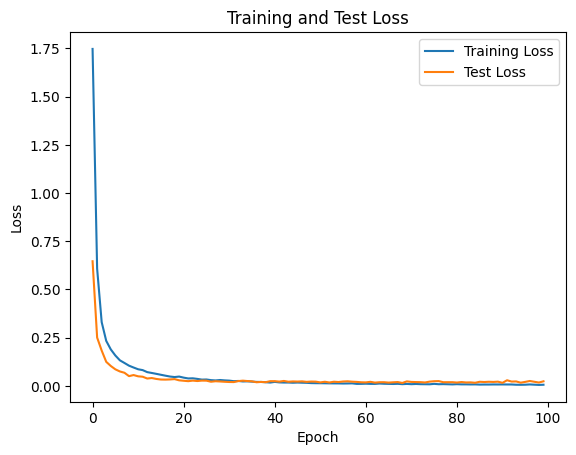

In [ ]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

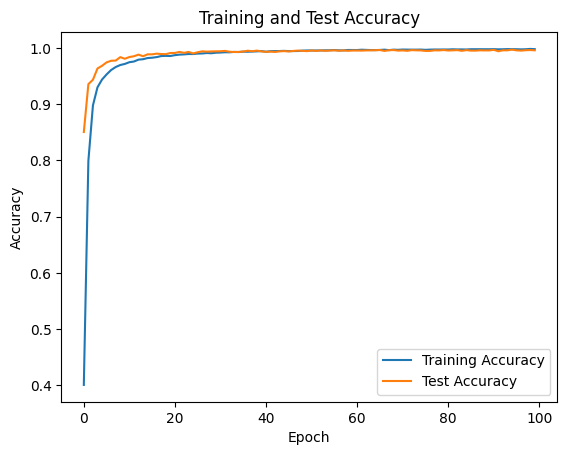

In [ ]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## Dự đoán

In [ ]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

175/175 [==============================] - 1s 2ms/step


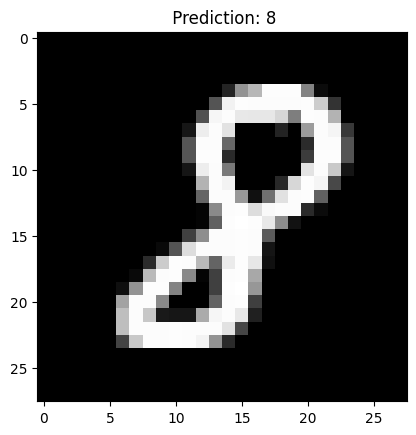

In [ ]:
# Choose an index.
index = np.random.randint(X_test.shape[0])
predict_label = np.argmax(predictions[index])
# Show an image from the test set.
plt.imshow(X_test[index], cmap='gray')
plt.title(f' Prediction: {predict_label}')
plt.show()

Tải lại model đã lưu để chạy

In [ ]:
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Part_2_Third_Year/Machine learning/Final_Exam/model_saved/best_model_1.hdf5')
# Compile the model (if needed)
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

# Evaluate the model on a test dataset
test_loss, test_acc = loaded_model.evaluate(X_test, y_test, verbose=2)



175/175 - 1s - loss: 0.0163 - accuracy: 0.9955 - 732ms/epoch - 4ms/step


In [ ]:
# Make predictions using the model
loaded_predictions = loaded_model.predict(X_test)

175/175 [==============================] - 0s 2ms/step


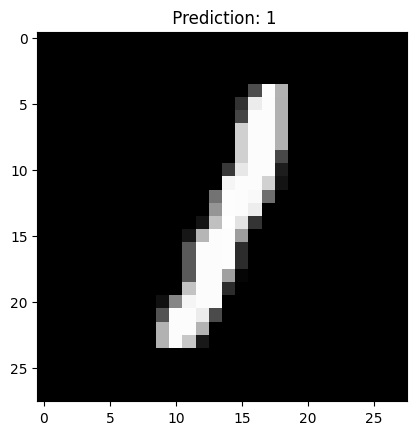

In [ ]:
# Choose an index.
index = np.random.randint(10000)
predict_label = np.argmax(loaded_predictions[index])
# Show an image from the test set.
plt.imshow(X_test[index], cmap='gray')
plt.title(f' Prediction: {predict_label}')
plt.show()